
# <p style="text-align:center"> <font color='darkorange'>**CUNEF**</font>
## <p style="text-align:center"> **El Pulso Político de Twitter Análisis de las Elecciones de Madrid 2023**
### <p style="text-align:center"> **5. Fine tunning GPT3- Davinci. Predicción de sentimiento.**</strong><br />
    
<p style="text-align:left">Pablo Mazariegos Reviriego - <font color='orange'>pablo.mazariegos@cunef.edu </font>

En este proyecto de Trabajo Fin de Máster, realizaremos un análisis de sentimiento de los tweets hechos por los 5 candidatos políticos a la presidencia de Madrid durante el período de campaña política que abarcó desde el 12 hasta el 27 de mayo de 2023. Utilizaremos una base de datos recopilada manualmente que contiene los tweets de los candidatos. El objetivo principal de este proyecto es desarrollar modelos de aprendizaje automático que puedan clasificar los tweets según su sentimiento (positivo, negativo o neutral).

El proyecto se organizará en diferentes cuadernos, cada uno enfocado en una etapa específica del proceso:

 1. EDA y Selección/Preparación de variables.
 2. Análisis gráfico y  Word Cloud.
 3. Modelos. Predicción de sentimiento.
 4. Modelos. Predicción de Partido político.
 5. <font color='darkgreen'> **Fine tunning GPT3- Davinci. Predicción de sentimiento.**</font>
 6. Fine tunning GPT3- Davinci. Predicción de Partido político.
 
En este cuaderno, utilizaremos el modelo GPT-3 Davinci de OpenAI para realizar fine-tuning, es decir, entrenaremos el modelo con nuestros propios datos para utilizarlo como un clasificador de texto. El objetivo principal es utilizar este modelo para predecir el sentimiento de los tweets. Para lograr esto, haremos uso del API de OpenAI, que nos permitirá interactuar con el modelo y realizar las tareas de entrenamiento y predicción

  **INDICE:**
 
 - [Importación de Librerias](#0) 
 - [Introducción del API OpenAI](#1) 
 - [Carga de datos](#2)
 - [Preparación de datos](#3)
 - [Porceso CLI Open AI](#4)
 - [Entrenamiento del modelo](#5)
 - [Resultados](#6)
 - [Pruebas del modelo](#7)

##  <a name="0"> Importación de Librerias</a>

In [2]:
import pandas as pd
import seaborn as sns
import json
import openai
from getpass import getpass
import unidecode
import os
import openai
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

##  <a name="1"> Introducción del API OpenAI</a>

Con este metodo de introducción el API se mantendra privada y oculta

In [73]:
API_KEY_OPENAI = getpass('Introduce tu API_KEY de Open AI:')

openai.api_key = API_KEY_OPENAI
os.environ['OPENAI_API_KEY'] = API_KEY_OPENAI

Introduce tu API_KEY de Open AI:········


##  <a name="2"> Carga de datos</a>

In [32]:
file_path = '../data/processed/df_sentimiento_final.csv'
df = pd.read_csv(file_path)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,partido,partido_num,candidato,nick,followers,fecha,post,post_clean,sentimiento,sentimiento_num,...,comments vs viewed,shared,shared vs viewed,likes,likes vs viewed,votos,porcentaje,escaños,Num_words_POST,sentimiento_clean
0,pp,4,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Comenzamos la campaña, una vez más, junto a la...","comenzamos la campana, una vez mas, junto a la...",positive,2,...,0.003373,261,0.004446,1260,0.021465,1586985,0.4734,70,42,comenzamos campana vez mas junto agricultura c...
1,pp,4,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Madrid es la región del Espíritu de Ermua, la ...","madrid es la region del espiritu de ermua, la ...",negative,0,...,0.005413,561,0.005522,2127,0.020935,1586985,0.4734,70,24,madrid region espiritu ermua admite totalitari...
2,pp,4,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-12,"Majadahonda con ganas de Libertad, familia, un...","majadahonda con ganas de libertad, familia, un...",positive,2,...,0.002345,213,0.003568,1042,0.017454,1586985,0.4734,70,17,majadahonda ganas libertad familia unidad aleg...
3,pp,4,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-13,Presidente: líbranos del mal.,presidente: libranos del mal.,positive,2,...,0.002700,549,0.001660,2592,0.007836,1586985,0.4734,70,4,presidente libranos mal
4,pp,4,Isabel Díaz Ayuso,@IdiazAyuso,912100,2023-05-13,En Madrid sólo habrá 2 tarifas de transporte p...,en madrid solo habra 2 tarifas de transporte p...,negative,0,...,0.001445,759,0.003562,3016,0.014153,1586985,0.4734,70,51,madrid solo habra 2 tarifas transporte publico...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   partido             770 non-null    object 
 1   partido_num         770 non-null    int64  
 2   candidato           770 non-null    object 
 3   nick                770 non-null    object 
 4   followers           770 non-null    int64  
 5   fecha               770 non-null    object 
 6   post                770 non-null    object 
 7   post_clean          770 non-null    object 
 8   sentimiento         770 non-null    object 
 9   sentimiento_num     770 non-null    int64  
 10  negative            770 non-null    float64
 11  neutral             770 non-null    float64
 12  positive            770 non-null    float64
 13  video               770 non-null    bool   
 14  foto                770 non-null    bool   
 15  repost              770 non-null    bool   
 16  retweet 

##  <a name="3"> Preparación de datos</a>

El proceso de fine-tuning puede aplicarse a los modelos base de OpenAI, que son: davinci, curie, babbage y ada. Estos modelos no tienen entrenamiento de seguimiento de instrucciones, lo que significa que se pueden personalizar a través de este proceso.

En cuanto a los datos de entrenamiento, se deben preparar en forma de JSONL, que es un formato de archivo conveniente para almacenar estructuras de datos. En este caso, cada línea del archivo representa un objeto JSON independiente y corresponde a un par de prompt-completitud.

En este escenario, el "prompt" podría ser un tweet y la "completitud" es la etiqueta del sentimiento correspondiente.
En este formato, cada línea constituirá un ejemplo de entrenamiento para el modelo. La idea es que, al ver suficientes de estos pares prompt-completitud, el modelo aprenda a generalizar y a predecir la "completitud" que no ha visto antes.


In [46]:
labels =  df['sentimiento']
texts = [text.strip() for text in df['post_clean']]
df_new = pd.DataFrame(zip(texts, labels), columns = ['prompt','completion']) #[:300]
df_new.head()

,prompt,completion
0,"comenzamos la campana, una vez mas, junto a la...",positive
1,"madrid es la region del espiritu de ermua, la ...",negative
2,"majadahonda con ganas de libertad, familia, un...",positive
3,presidente: libranos del mal.,positive
4,en madrid solo habra 2 tarifas de transporte p...,negative


## Guardamos los tweets y partido en un JSONL

In [80]:
df_new.to_json("formatted_tweets_sentimiento.jsonl", orient='records', lines=True)

**Comprobamos que el JSONL existe y esta correctamente escirto:**

In [85]:
file_path = 'formatted_tweets_sentimiento.jsonl'

# Verificar si el archivo JSONL existe
if os.path.exists(file_path):
    print("El archivo JSONL existe.")
else:
    print("El archivo JSONL no existe.")

# Leer el contenido del archivo JSONL
json_data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        entry = json.loads(line)
        json_data.append(entry)

# Verificar si el archivo JSONL está vacío
if len(json_data) > 0:
    print("El archivo JSONL no está vacío.")
else:
    print("El archivo JSONL está vacío.")

# Imprimir algunos datos del archivo JSONL
print("Primeros 5 registros del archivo JSONL:")
for entry in json_data[:5]:
    print(entry)

El archivo JSONL existe.
El archivo JSONL no está vacío.
Primeros 5 registros del archivo JSONL:
{'prompt': ' comenzamos la campana, una vez mas, junto a la agricultura y el campo madrileno.  con nuevas propuestas para los agricultores, rejuvenecer el sector y menos trabas. contra los incendios, por el patrimonio natural y un aire limpio.  ganas de un madrid natural. ', 'completion': 'positivo'}
{'prompt': ' madrid es la region del espiritu de ermua, la que no admite totalitarios, ni trata como forasteros ni traga con presentar etarras en listas. ', 'completion': 'negativo'}
{'prompt': ' majadahonda con ganas de libertad, familia, unidad, alegria, calidad de vida. con    , su futura gran alcaldesa. ', 'completion': 'positivo'}
{'prompt': ' presidente: libranos del mal. ', 'completion': 'positivo'}
{'prompt': ' en madrid solo habra 2 tarifas de transporte publico: la a, para madrid capital, y la b, para el resto de la region. con esta medida, millones de ciudadanos se ahorraran hasta 18

##  <a name="4"> Proceso CLI OpenAI </a>

La CLI (Interfaz de Línea de Comandos) de OpenAI es una herramienta que permite interactuar con la API de OpenAI desde la línea de comandos. En este contexto, se utiliza para ayudar a preparar tus datos de entrenamiento para el fine-tuning.

El proceso de preparación de datos puede implicar la revisión de los datos y la realización de modificaciones para mejorar el rendimiento del modelo. Sin embargo, es importante tener en cuenta que, aunque la herramienta CLI puede hacer algunas transformaciones básicas en los datos, no es perfecta. 

Además, no existe hasta la fecha de este proyecto una forma de personalizar completamente este proceso. Por lo tanto, podría ser necesario realizar un pre procesamiento de datos o ajustes antes de usar la CLI para asegurar de que los datos de entrenamiento estén en el estado ideal para tu tarea específica.

Una vez finalizado el proceso de línea de comandos (CLI), se procede a cargar los datos de entrenamiento y validación con el objetivo de iniciar el entrenamiento del modelo. Una vez completado este entrenamiento, el sistema generará y proporcionará un identificador único (ID de modelo). Este ID es crucial, ya que permite la interacción posterior con el modelo: se puede utilizar para consultar datos, fine tuning en el modelo, o incluso para poner el modelo en producción.


In [81]:
!openai tools fine_tunes.prepare_data -f formatted_tweets_sentimiento.jsonl -q

Analyzing...

- Your file contains 770 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 5 duplicated prompt-completion sets. These are rows: [117, 425, 526, 539, 592]
- All prompts end with suffix ` `
- All prompts start with prefix ` `
- The completion should start with a whitespace character (` `). This tends to produce better results due to the tokenization we use. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more details

Based on the analysis we will perform the following actions:
- [Recommended] Remove 5 duplicate rows [Y/n]: Y
- [Recommended] Add a whitespace character to the beginning of the completion [Y/n]: Y
- [Recommended] Would you like t

C:\Users\Pablo\anaconda3\envs\tfm\lib\site-packages\openai\validators.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["completion"] = x["completion"].apply(


**Sobre cambios en los parametros del preprocesado anterior:**

- Chat GPT:

"Lamentablemente, en el caso específico del comando !openai tools fine_tunes.prepare_data, las recomendaciones de rendimiento sugeridas no se pueden cambiar directamente desde el código. Las recomendaciones son proporcionadas por la herramienta de ajuste fino de OpenAI en función del análisis de los datos proporcionados."

##  <a name="5"> Entrenamiento del modelo</a>

**Subida de lo JSONL de entrenamiento y test:**

En este cuaderno, hemos subido los datos en formato JSONL, divididos en conjuntos de entrenamiento y prueba, utilizando la interfaz de línea de comandos (CLI) proporcionada anteriormente. A continuación, procederemos a entrenar el modelo utilizando estos datos.

El entrenamiento del modelo se realizará utilizando el fine-tuning, donde ajustaremos los parámetros del modelo preentrenado GPT-3 Davinci utilizando nuestros propios datos. Este proceso permitirá al modelo aprender a clasificar los tweets según el partido político al que pertenecen.

Durante el entrenamiento, el modelo se ajustará a los datos de entrenamiento y se optimizará para minimizar el error en la clasificación de los tweets.

Una vez finalizado el entrenamiento, el modelo estará listo para realizar predicciones en el conjunto de prueba y evaluar su rendimiento en datos no vistos anteriormente. Utilizaremos métricas de evaluación adecuadas para medir la precisión y el rendimiento general del modelo.

En resumen, hemos subido los datos de entrenamiento y prueba en formato JSONL a través de la interfaz de línea de comandos y estamos a punto de iniciar el entrenamiento del modelo GPT-3 Davinci utilizando estos datos para predecir el partido político asociado a los tweets.

In [82]:
!openai api fine_tunes.create \
  -t "formatted_tweets_sentimiento_prepared_train.jsonl" \
  -v "formatted_tweets_sentimiento_prepared_valid.jsonl" \
  -m "davinci" \
  --compute_classification_metrics \
  --classification_n_classes 3


Uploaded file from formatted_tweets_sentimiento_prepared_train.jsonl: file-no7J26ibArjCzkFTtcRSCv8O
Uploaded file from formatted_tweets_sentimiento_prepared_valid.jsonl: file-L0tBZYWXhT1Pn2u21T3ttaJy
Created fine-tune: ft-hI7lTgLZQ0atcurvqsN1B0wu
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2023-06-09 23:39:27] Created fine-tune: ft-hI7lTgLZQ0atcurvqsN1B0wu




Upload progress:   0%|          | 0.00/116k [00:00<?, ?it/s]
Upload progress: 100%|##########| 116k/116k [00:00<00:00, 106Mit/s]

Upload progress:   0%|          | 0.00/31.1k [00:00<?, ?it/s]
Upload progress: 100%|##########| 31.1k/31.1k [00:00<00:00, 15.1Mit/s]


Podemos comprobar el nombre del modelo con el ID del modelo para poder realizar las pruebas más adelante

In [121]:
openai.FineTune.list_events(id="ft-hI7lTgLZQ0atcurvqsN1B0wu")

<OpenAIObject list at 0x1e17bb81f90> JSON: {
  "data": [
    {
      "created_at": 1686346767,
      "level": "info",
      "message": "Created fine-tune: ft-hI7lTgLZQ0atcurvqsN1B0wu",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1686346912,
      "level": "info",
      "message": "Fine-tune costs $4.12",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1686346912,
      "level": "info",
      "message": "Fine-tune enqueued. Queue number: 15",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1686346973,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 14",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1686346975,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 13",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1686346976,
      "level": "info",
      "message": "Fine-tune is in the queue. Queue number: 11",
      "object"

**Nombre:**

    ft-personal-2023-06-09-22-24-07

##  <a name="6"> Resultados</a>

Extraemos los resultados con el ID del modelo:

In [122]:
!openai api fine_tunes.results -i ft-hI7lTgLZQ0atcurvqsN1B0wu > ../data/processed/metricas_gpt_sentimiento.csv

**Imprimimos los resultados:**

In [24]:
results = pd.read_csv('../data/processed/metricas_gpt_sentimiento.csv')
results[results['classification/accuracy'].notnull()].tail(1)

,step,elapsed_tokens,elapsed_examples,training_loss,training_sequence_accuracy,training_token_accuracy,validation_loss,validation_sequence_accuracy,validation_token_accuracy,classification/accuracy,classification/weighted_f1_score
2448,2449,146305,2449,0.014811,1.0,1.0,0.014209,1.0,1.0,0.803922,0.802568


<Axes: >

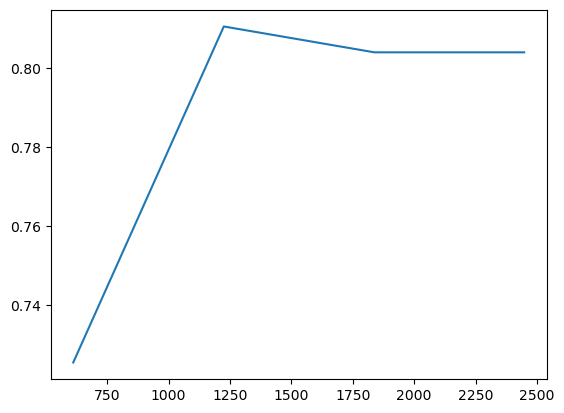

In [25]:
results[results['classification/accuracy'].notnull()]['classification/accuracy'].plot()


##  <a name="7"> Pruebas</a>

En este cuaderno, realizaremos pruebas del modelo utilizando el sistema prompting. Usaremos el modelo GPT-3 Davinci de OpenAI y le proporcionaremos un tweet como entrada. El modelo procesará el texto y nos devolverá la predicción del sentimiento asociado al tweet. Utilizaremos este enfoque de prompting para obtener resultados precisos y comprensibles sobre el sentimiento de cada tweet.

**TWEET:**

Rocio Monasterio
@monasterioR


El PP no han querido derogar en diciembre de 2021, ni en febrero 2023 una Ley Trans autonómica en la Comunidad de Madrid que pone en riesgo a los menores y ahora dicen que derogarán la nacional. 

Yo no entiendo nada, de nada.

In [6]:
ft_model = 'davinci:ft-personal-2023-06-09-22-24-07'
tweet = """ el pp no han querido derogar en diciembre de 2021, 
ni en febrero 2023 una ley trans autonomica en la comunidad de madrid que pone en riesgo a los menores y 
ahora dicen que derogaran la nacional.
yo no entiendo nada, de nada. """
res = openai.Completion.create(model=ft_model, prompt=tweet, max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' neg'

**TWEET:**

Isabel Díaz Ayuso
@IdiazAyuso Jun 6


Lo más grave es escuchar a ministros del Gobierno malmetiendo sin saber quién compone la comisión que decide el contenido de las pruebas. 
Empezando por la ministra de Educación. 
Viven desde y para el activismo político.

In [7]:
ft_model = 'davinci:ft-personal-2023-06-09-22-24-07'
tweet = """ Lo más grave es escuchar a ministros del Gobierno malmetiendo sin saber quién compone la comisión que decide el contenido de las pruebas. 

Empezando por la ministra de Educación. 

Viven desde y para el activismo político.. """
res = openai.Completion.create(model=ft_model, prompt=tweet, max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' neg'

**Prueba de sentimiento positivo:**

In [9]:
ft_model = 'davinci:ft-personal-2023-06-09-22-24-07'
tweet = """ amor. """
res = openai.Completion.create(model=ft_model, prompt=tweet, max_tokens=1, temperature=0, logprobs=2)
res['choices'][0]['text']

' posit'